# CBD2214 - Big Data Fundamental Data Storage Networking
# Assignment #2 - Predicting students dropout and academic success

__Group 5 - Members__
- Aishlee C0913045
- Ashick Rijo C0910364
- Ernie Sumoso Vicuna C0881591
- Danilo Diaz C0889539
- Yogita Sharma C0913011

__Content Index__:
- __1.__ Dataset Description and Specification
- __2.__ Stage 3 - Data Acquisition & Filtering
- __3.__ Stage 4 - Data extraction
- __4.__ Stage 5 - Validation and Cleansing
- __5.__ Stage 6 - Data aggregation & Representation
- __6.__ Stage 7 - Data Analysis
- __7.__ Stage 8 - Data Visualization (Results of Implementation)
- __8.__ Conclusion
- __9.__ References

# 1. Dataset Description and Specification

For this assignment we want to __predict a student academic success, enrollment, or dropout based on their multiple features__.

We will use a dataset called "Students' dropout and academic success" extracted from the UC Irvine Machine Learning Repository Archive:

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

This dataset was created on December 2021 from higher education institutions from different databases around the world.

Each row (instance) of the dataset is a different individual student. They may belong to different undergraduate degrees and programs.

Students may also present different demographics, and social-economic factors, and academic paths. Our data includes their grades from the 1st and 2nd semesters.

In total, we have __4424 rows__ and __37 features__: 36 predictive variables and 1 target.

The features provided for each record are:
- __Marital Status__: is the student married
- __Application mode__: how did the student applied to their education program
- __Application order__: application order of the student (0 - first choice; and 9 last choice)
- __Course__: the student's program or course
- __Daytime/evening attendance__: program schedule time
- __Previous qualification__: student's previous education
- __Previous qualification (grade)__: student's previous grade
- __Nationality__: country of origin
- __Mother's qualification__: student's mother qualification
- __Father's qualification__: student's father qualification
- __Mother's occupation__: occupation of the student's mother
- __Father's occupation__: occupation of the stundet's father
- __Admission grade__: student's grade for the admission exam
- __Displaced__: did the student had to displace from home
- __Educational special needs__: student special education needs
- __Debtor__: does the student has debts
- __Tuition fees up to date__: is the student up to date with tuition fees
- __Gender__: gender of the student
- __Scholarship holder__: does the student holds an scholarship
- __Age at enrollment__: student's age at the time of enrollment
- __International__: is the student an international student
- __Curricular units 1st sem (credited)__: Number of curricular units credited in the 1st semester
- __Curricular units 1st sem (enrolled)__: Number of curricular units enrolled in the 1st semester
- __Curricular units 1st sem (evaluations)__: Number of evaluations to curricular units in the 1st semester
- __Curricular units 1st sem (approved)__: Number of curricular units approved in the 1st semester
- __Curricular units 1st sem (grade)__: Grade average in the 1st semester (between 0 and 20)
- __Curricular units 1st sem (without evaluations)__: Number of curricular units without evalutions in the 1st semester
- __Curricular units 2nd sem (credited)__: Number of curricular units credited in the 2nd semester
- __Curricular units 2nd sem (enrolled)__: Number of curricular units enrolled in the 2nd semester
- __Curricular units 2nd sem (evaluations)__: Number of evaluations to curricular units in the 2nd semester
- __Curricular units 2nd sem (approved)__: Number of curricular units approved in the 2nd semester
- __Curricular units 2nd sem (grade)__: Grade average in the 2nd semester (between 0 and 20)
- __Curricular units 2nd sem (without evaluations)__: Number of curricular units without evalutions in the 2st semester
- __Unemployment rate__: Unemployment rate (%) of the student's college country
- __Inflation rate__: Inflation rate (%) in the student's college country
- __GDP__: Gross Domestic Product in the student's college country
- __Target__: Three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course

We will perform a __predictive analysis__ to __determine whether a student will graduate, dropout__ or continue to be enrolled __in college__.

# Stage 3 - Data Acquisition & Filtering

Let's start with the data acquisition and __read__ our __dataset__ from the provided file in CSV format.

In this case we will __acquire data from__ UCI Machine Learning Repository, which will be our single source of data for this analysis.

In [1]:
# import required libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import json
from fuzzywuzzy import process
warnings.filterwarnings('ignore')

D:\Anaconda\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# load dataset from the csv file
df = pd.read_csv('students_dropout.csv')

# visualize the dataset
df.head()

,maritalStatus,applicationMode,applicationOrder,course,attendanceMode,previousQualification,previousQualificationGrade,nationality,mothersQualification,fathersQualification,...,curricularUnits2ndSemesterCredited,curricularUnits2ndSemesterEnrolled,curricularUnits2ndSemesterEvaluations,curricularUnits2ndSemesterApproved,curricularUnits2ndSemesterGrade,curricularUnits2ndSemesterWithoutEvaluations,unemploymentRate,inflationRate,GDP,target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# show column names
df.columns

Index(['maritalStatus', 'applicationMode', 'applicationOrder', 'course',
       'attendanceMode', 'previousQualification', 'previousQualificationGrade',
       'nationality', 'mothersQualification', 'fathersQualification',
       'mothersOccupation', 'fathersOccupation', 'admissionGrade', 'displaced',
       'educationalSpecialNeeds', 'debtor', 'tuitionFeesUpToDate', 'gender',
       'scholarshipHolder', 'ageAtEnrollment', 'international',
       'curricularUnits1stSemesterCredited',
       'curricularUnits1stSemesterEnrolled',
       'curricularUnits1stSemesterEvaluations',
       'curricularUnits1stSemesterApproved', 'curricularUnits1stSemesterGrade',
       'curricularUnits1stSemesterWithoutEvaluations',
       'curricularUnits2ndSemesterCredited',
       'curricularUnits2ndSemesterEnrolled',
       'curricularUnits2ndSemesterEvaluations',
       'curricularUnits2ndSemesterApproved', 'curricularUnits2ndSemesterGrade',
       'curricularUnits2ndSemesterWithoutEvaluations', 'unemploym

In [4]:
# display number of rows and columns
df.shape

(4424, 37)

Our dataset has __4424 rows__ and __37 columns__ (36 predictive variables and 1 target).

__Let's try to filter out corrupted data.__

In [5]:
# checking for null or missing values
df.isnull().sum()

maritalStatus                                   0
applicationMode                                 0
applicationOrder                                0
course                                          0
attendanceMode                                  0
previousQualification                           2
previousQualificationGrade                      0
nationality                                     0
mothersQualification                            0
fathersQualification                            0
mothersOccupation                               0
fathersOccupation                               0
admissionGrade                                  0
displaced                                       0
educationalSpecialNeeds                         0
debtor                                          0
tuitionFeesUpToDate                             0
gender                                          0
scholarshipHolder                               0
ageAtEnrollment                                 0


__Apparently there are no missing values.__

However, let's check for __unique values__ on our categorical columns.

In [6]:
# data types of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   maritalStatus                                 4424 non-null   object 
 1   applicationMode                               4424 non-null   object 
 2   applicationOrder                              4424 non-null   int64  
 3   course                                        4424 non-null   object 
 4   attendanceMode                                4424 non-null   object 
 5   previousQualification                         4422 non-null   object 
 6   previousQualificationGrade                    4424 non-null   float64
 7   nationality                                   4424 non-null   object 
 8   mothersQualification                          4424 non-null   object 
 9   fathersQualification                          4424 non-null   o

Based on the types of our columns we can __identify our numerical and categorical columns__.

In [7]:
# define our categorical columns
categorical_cols = ['maritalStatus', 'applicationMode', 'course', 'attendanceMode', 'previousQualification', 'nationality', 'mothersQualification',
                   'fathersQualification', 'mothersOccupation', 'fathersOccupation', 'displaced', 'educationalSpecialNeeds', 'debtor', 'tuitionFeesUpToDate',
                   'gender', 'scholarshipHolder', 'target']
# define our numerical columns
numerical_cols = []
for col in df.columns:
    if col not in categorical_cols:
        numerical_cols.append(col)

print(f"We have {len(numerical_cols)} nuemrical columns, and {len(categorical_cols)} categorical columns", end="\n\n")
print(f"Our numerical columns are:")
display(numerical_cols)
print()
print(f"Our categorical columns are:")
display(categorical_cols)

We have 20 nuemrical columns, and 17 categorical columns

Our numerical columns are:


['applicationOrder',
 'previousQualificationGrade',
 'admissionGrade',
 'ageAtEnrollment',
 'international',
 'curricularUnits1stSemesterCredited',
 'curricularUnits1stSemesterEnrolled',
 'curricularUnits1stSemesterEvaluations',
 'curricularUnits1stSemesterApproved',
 'curricularUnits1stSemesterGrade',
 'curricularUnits1stSemesterWithoutEvaluations',
 'curricularUnits2ndSemesterCredited',
 'curricularUnits2ndSemesterEnrolled',
 'curricularUnits2ndSemesterEvaluations',
 'curricularUnits2ndSemesterApproved',
 'curricularUnits2ndSemesterGrade',
 'curricularUnits2ndSemesterWithoutEvaluations',
 'unemploymentRate',
 'inflationRate',
 'GDP']


Our categorical columns are:


['maritalStatus',
 'applicationMode',
 'course',
 'attendanceMode',
 'previousQualification',
 'nationality',
 'mothersQualification',
 'fathersQualification',
 'mothersOccupation',
 'fathersOccupation',
 'displaced',
 'educationalSpecialNeeds',
 'debtor',
 'tuitionFeesUpToDate',
 'gender',
 'scholarshipHolder',
 'target']

In [8]:
# Checking the unique values in each categorical column
for col in df[categorical_cols]:
    print(f"\033[94mUnique values in '{col}' column:")
    print(df[col].unique()[:15], end='\n\n')

Unique values in 'maritalStatus' column:
['single' 'married' 'divorced' 'widower' 'facto_union' 'legally_separated']

Unique values in 'applicationMode' column:
['2nd phase - general contingent' 'International student (bachelor)'
 '1st phase - general contingent' 'Over 23 years old'
 '3rd phase - general contingent' 'Short cycle diploma holders'
 'Technological specialization diploma holders'
 'Change of institution/course' 'Change of course'
 'Holders of other higher courses' 'Transfer'
 '1st phase - special contingent (Madeira Island)'
 '1st phase - special contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99']

Unique values in 'course' column:
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (evening attendance)'
 'Management (evening attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Basic Education'
 'Veterinary Nursing' 'Equinculture' 'Oral Hygiene' 'Management

We can notice there are some missing values for certain columns.

These missing values are filled as __'nan', 'Unknown',__ or __'(blank)'__.

Let's __handle these values as corrupted data__ and label them as __missing values__.

In [9]:
# replace 'nan', 'Unknown', and '(blank)' with actual missing values
df.replace('nan', np.nan, inplace=True)
df.replace('Unknown', np.nan, inplace=True)
df.replace('(blank)', np.nan, inplace=True)

Now we can visualize the __real amount of missing values on our dataset__.

In [10]:
# checking for null or missing values
df.isnull().sum()

maritalStatus                                     0
applicationMode                                   0
applicationOrder                                  0
course                                            0
attendanceMode                                    0
previousQualification                             2
previousQualificationGrade                        0
nationality                                       0
mothersQualification                            130
fathersQualification                            112
mothersOccupation                                17
fathersOccupation                                19
admissionGrade                                    0
displaced                                         0
educationalSpecialNeeds                           0
debtor                                            0
tuitionFeesUpToDate                               0
gender                                            0
scholarshipHolder                                 0
ageAtEnrollm

In [11]:
# list of the columns that contain missing values
columns_with_missing_values = [col for col in df.columns if df[col].isnull().sum() > 0]

# calculate the %e of missing values for columns with missing values
df[columns_with_missing_values].isnull().mean().sort_values(ascending=False) * 100

mothersQualification     2.938517
fathersQualification     2.531646
fathersOccupation        0.429476
mothersOccupation        0.384268
previousQualification    0.045208
dtype: float64

As the __corrupted data is minimal__ (around __2.5%__ for two columns, and __0.5%__ for another three columns),

We can proceed to __delete these rows to filter out the corrupted data__.

In [12]:
# Let's drop the rows with missing values
df.dropna(inplace=True)

In [13]:
# checking for null or missing values
df.isnull().sum()

maritalStatus                                   0
applicationMode                                 0
applicationOrder                                0
course                                          0
attendanceMode                                  0
previousQualification                           0
previousQualificationGrade                      0
nationality                                     0
mothersQualification                            0
fathersQualification                            0
mothersOccupation                               0
fathersOccupation                               0
admissionGrade                                  0
displaced                                       0
educationalSpecialNeeds                         0
debtor                                          0
tuitionFeesUpToDate                             0
gender                                          0
scholarshipHolder                               0
ageAtEnrollment                                 0


In [14]:
# display number of rows and columns
df.shape

(4276, 37)

After dropping missing values we are left with __4276 rows__.

Now we truly have __zero missing values on our dataset__.

We have succesfully __acquired__ our dataset from UCI Machine Learning Repository and __filter out corrupted data__.

# Stage 4 - Data extraction

On this stage we __extract__ and __transform__ our __data__ into a __usable format__ for the analysis.

For this dataset we need our dataset in a structured __tabular format__, which we already have.

We do not need to perform any further extraction steps.

However we can __standarize our column names for a better understanding during our analysis__.

In [15]:
# Show columns names
df.columns

Index(['maritalStatus', 'applicationMode', 'applicationOrder', 'course',
       'attendanceMode', 'previousQualification', 'previousQualificationGrade',
       'nationality', 'mothersQualification', 'fathersQualification',
       'mothersOccupation', 'fathersOccupation', 'admissionGrade', 'displaced',
       'educationalSpecialNeeds', 'debtor', 'tuitionFeesUpToDate', 'gender',
       'scholarshipHolder', 'ageAtEnrollment', 'international',
       'curricularUnits1stSemesterCredited',
       'curricularUnits1stSemesterEnrolled',
       'curricularUnits1stSemesterEvaluations',
       'curricularUnits1stSemesterApproved', 'curricularUnits1stSemesterGrade',
       'curricularUnits1stSemesterWithoutEvaluations',
       'curricularUnits2ndSemesterCredited',
       'curricularUnits2ndSemesterEnrolled',
       'curricularUnits2ndSemesterEvaluations',
       'curricularUnits2ndSemesterApproved', 'curricularUnits2ndSemesterGrade',
       'curricularUnits2ndSemesterWithoutEvaluations', 'unemploym

In [16]:
# Cleaning our column names deleting leading and tailing white spaces
df.columns = df.columns.str.strip()

Our __dataset is in tabular format__. Let's confirm the number of rows, columns, duplicates & missing values.

In [17]:
# Checking the shape of the dataset, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 4276
Number of features (columns) in the dataset are: 37
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 0


# Stage 5 - Validation and Cleansing

On this stage we __establish complex validation rules__ and __apply them on our dataset to remove invalid data__.

First, let's check for duplicated rows.

In [18]:
# Display the number of duplicated rows
print("Number of duplicated rows:", df[df.duplicated()].shape[0])

Number of duplicated rows: 0


In the Stage 3 we have __identified our numerical and categorical columns__.

On this Stage 5, we need to identify them once again __to perform multiple validations.__

In [19]:
print(f"We have {len(numerical_cols)} nuemrical columns, and {len(categorical_cols)} categorical columns", end="\n\n")
print(f"Our numerical columns are:")
display(numerical_cols)
print()
print(f"Our categorical columns are:")
display(categorical_cols)

We have 20 nuemrical columns, and 17 categorical columns

Our numerical columns are:


['applicationOrder',
 'previousQualificationGrade',
 'admissionGrade',
 'ageAtEnrollment',
 'international',
 'curricularUnits1stSemesterCredited',
 'curricularUnits1stSemesterEnrolled',
 'curricularUnits1stSemesterEvaluations',
 'curricularUnits1stSemesterApproved',
 'curricularUnits1stSemesterGrade',
 'curricularUnits1stSemesterWithoutEvaluations',
 'curricularUnits2ndSemesterCredited',
 'curricularUnits2ndSemesterEnrolled',
 'curricularUnits2ndSemesterEvaluations',
 'curricularUnits2ndSemesterApproved',
 'curricularUnits2ndSemesterGrade',
 'curricularUnits2ndSemesterWithoutEvaluations',
 'unemploymentRate',
 'inflationRate',
 'GDP']


Our categorical columns are:


['maritalStatus',
 'applicationMode',
 'course',
 'attendanceMode',
 'previousQualification',
 'nationality',
 'mothersQualification',
 'fathersQualification',
 'mothersOccupation',
 'fathersOccupation',
 'displaced',
 'educationalSpecialNeeds',
 'debtor',
 'tuitionFeesUpToDate',
 'gender',
 'scholarshipHolder',
 'target']

Let's __perform a string validation on our categorical columns__ to delete possible leading and tailing white spaces in our string values.

In [20]:
# Delete extra spaces from our values (for categorical columns)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

Now let's __perform a range validation on our numerical columns__ to delete existing out-of-range values (i.e. negative values, zero values on certain columns).

But first, we need to __understand the acceptable ranges for each of our numerical columns__.

| Numerical Column Name | Type | Range |
| --- | --- | --- |
| __applicationOrder__ | Ordinal (integer) | [0 - 9] |
| __previousQualificationGrade__ | Continuous (decimal) | [0 - 200] |
| __admissionGrade__ | Continuous (decimal) | [0 - 200] |
| __ageAtEnrollment__ | Ordinal (integer) | [15 - 70] |
| __international__ | Nominal (integer) | [0, 1] |
| __curricularUnits1stSemesterCredited__ | Continuous (integer) | [0 - 20]|
| __curricularUnits1stSemesterEnrolled__ | Continuous (integer) | [0 - 30]|
| __curricularUnits1stSemesterEvaluations__ | Continuous (integer) | [0 - 50]|
| __curricularUnits1stSemesterApproved__ | Continuous (integer) | [0 - 30]|
| __curricularUnits1stSemesterGrade__ | Continuous (decimal) | [0 - 20]|
| __curricularUnits1stSemesterWithoutEvaluations__ | Continuous (integer) | [0 - 15]|
| __curricularUnits2ndSemesterCredited__ | Continuous (integer) | [0 - 20]|
| __curricularUnits2ndSemesterEnrolled__ | Continuous (integer) | [0 - 30]|
| __curricularUnits2ndSemesterEvaluations__ | Continuous (integer) | [0 - 50]|
| __curricularUnits2ndSemesterApproved__ | Continuous (integer) | [0 - 30]|
| __curricularUnits2ndSemesterGrade__ | Continuous (decimal) | [0 - 20]|
| __curricularUnits2ndSemesterWithoutEvaluations__ | Continuous (integer) | [0 - 15]|
| __unemploymentRate__ | Discrete (decimal) | [1 - 20]|
| __inflationRate__ | Discrete (decimal) | [-5 - +5]|
| __GDP__ | Discrete (decimal) | [-5 - +5]|

Now that we understand the acceptable ranges for our numerical columns, __let's check the unique values for our numerical columns__.

In [21]:
# Check the unique values of our numerical variables
for col in numerical_cols:
    print(f"\033[94mUnique values in '{col}' column:")
    print(df[col].unique()[:50], end='\n\n')

Unique values in 'applicationOrder' column:
[5 1 2 4 3 6 9 0]

Unique values in 'previousQualificationGrade' column:
[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170. ]

Unique values in 'admissionGrade' column:
[127.3 142.5 124.8 119.6 141.5 114.8 128.4 113.1 129.3 123.  130.6 119.3
 130.2 111.8 137.1 120.7 137.4 136.3 124.6 120.3 121.8 125.5 114.9 123.9
 157.  116.4 131.  122.1 118.8 150.  130.  138.8 134.5 131.4 102.5 122.9
 113.9 120.  121.1 120.4 100.6 121.4 109.7 134.1 127.6 132.4 133.4 126.1
 113.5 121.3]

Unique values in 'ageAtEnrollment' column:
[20 19 45 50 18 22 21 34 37 55 39 29 24 27 23 26 33 35 25 44 36 43 47 28
 38 30 31 40 42 32 49 46 41 70 48 60 53 51 52 54 61 58 59 17 57 62]

Unique values in 'international' column:
[0 1]

Let's __clean our values perfoming our range validation__.

In [22]:
# Define our validation dictionary with the proper ranges for each column
validations = {'applicationOrder':[0, 9],
               'previousQualificationGrade':[0, 200],
               'admissionGrade':[0, 200],
               'ageAtEnrollment':[15, 70],
               'international':[0, 1],
               'curricularUnits1stSemesterCredited':[0, 20],
               'curricularUnits1stSemesterEnrolled':[0, 30],
               'curricularUnits1stSemesterEvaluations':[0, 50],
               'curricularUnits1stSemesterApproved':[0, 30],
               'curricularUnits1stSemesterGrade':[0, 20],
               'curricularUnits1stSemesterWithoutEvaluations':[0, 15],
               'curricularUnits2ndSemesterCredited':[0, 20],
               'curricularUnits2ndSemesterEnrolled':[0, 30],
               'curricularUnits2ndSemesterEvaluations':[0, 50],
               'curricularUnits2ndSemesterApproved':[0, 30],
               'curricularUnits2ndSemesterGrade':[0, 20],
               'curricularUnits2ndSemesterWithoutEvaluations':[0, 15],
               'unemploymentRate':[1, 20],
               'inflationRate':[-5, 5],
               'GDP':[-5, 5]}

# for each column, delete values that are outside the pre-defined ranges
for col in numerical_cols:
    df.drop(df[df[col] < validations[col][0]].index, inplace=True)
    df.drop(df[df[col] > validations[col][1]].index, inplace=True)

df.shape

(4276, 37)

We have __succesfully validated and cleaned our dataset__,

by __performing validations depending on our variables types__ (categorical or numerical) and deleting invalid data.

# Stage 6 - Data aggregation & Representation

On this stage, we are supossed to __integrate__ multiple datasets together into a __unified view__.

__However, for this analysis we are working with only one dataset gathered from a single source (UCI Machine Learning Repository).__

There is __no need to perform further aggregation__ or representation steps.

If we had multiple (2+) datasets, we could integrate them together into a single unified view (in tabular format) using common fields among the different datasets.

# Stage 7 - Data Analysis

Now we can start our data analysis to __predict if a student will dropout, graduate, or continue to be enrolled__ based on our predictive variables.

Our __target column__ named 'Target' is a __categorical variable__.

For our data analysis we have to perform the next steps:

- __7.1__ Target variable exploration
- __7.2__ Numerical variables exploration
- __7.3__ Handling Outliers
- __7.4__ Correlation between variables
- __7.5__ Standard Scaling, Label encoding, and One-Hot encoding
- __7.6__ Splitting the data - Test & Train datasets
- __7.7__ Modelling

# 7.1 Target variable exploration

First, let's explore the values of our target variable and how they are distributed accross our dataset.

The possible values for our target are:
- Graduate
- Dropout
- Enrolled

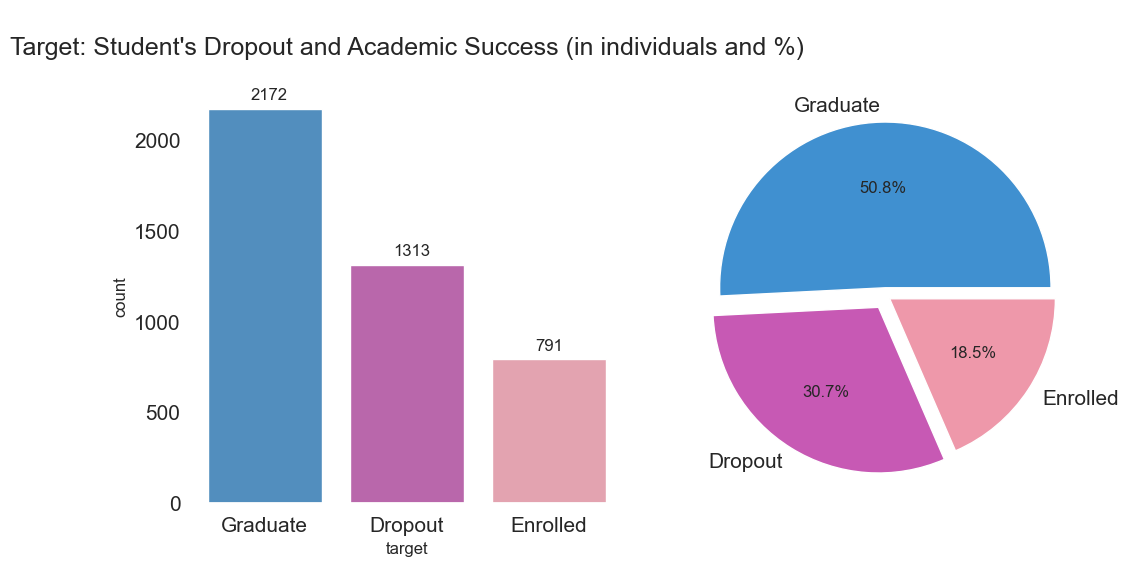

In [23]:
# Set the color palettes and sizes for our next plots using Seaborn
sns.set(rc={'axes.facecolor':'none', 'axes.grid':False, 'xtick.labelsize':15, 'ytick.labelsize':15, 'figure.autolayout':True})
my_palette = ('#4090D0','#C759B4', '#EE98AA', '#D2148C', '#FA5AD2','#FA9BD7', '#D81FD8','#F4A460','#F08080')
my_explode = [0.05, 0.08, 0.03]
plt.subplots(figsize=(15,15))

# Plot number of possible values for our target variable using a bar chart
plt.subplot(3,3,1)
plt.title("\nTarget: Student's Dropout and Academic Success (in individuals and %)\n", fontdict={'fontsize': 18})
ax = sns.countplot(x='target', data=df, palette=my_palette, order=df['target'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+50))

# Plot % of values for our target variable using a pie chart
plt.subplot(3,3,2)
df['target'].value_counts().plot(kind='pie', colors=my_palette, legend=None, explode=my_explode, ylabel='', autopct='%1.1f%%')
plt.show()

From our pie chart we can see that our target values are imbalanced as __50%__ of students have __graduated__, __30% have dropout__ and __18.5% are enrolled__.

Let's do some analysis on our __target variable as per the gender basis__.

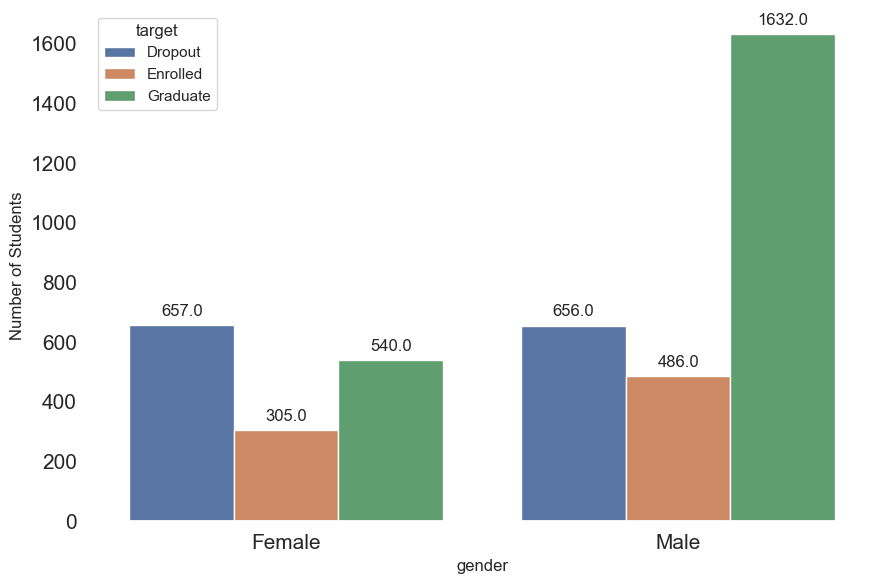

In [24]:
# plot the values of our target variable on a bar chart, per gender
plt.figure(figsize=(9,6))
ax = sns.countplot(data = df, x = 'gender', hue = 'target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks = [0, 1], labels = ['Female', 'Male'])
plt.ylabel('Number of Students')
ax.yaxis.grid(False)
ax.xaxis.grid(False)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

According to the data, a higher number of graduates are male and both genders have similar dropouts, altough males have higher enrolled students.

Let's explore our __target variable as per marital status__. 

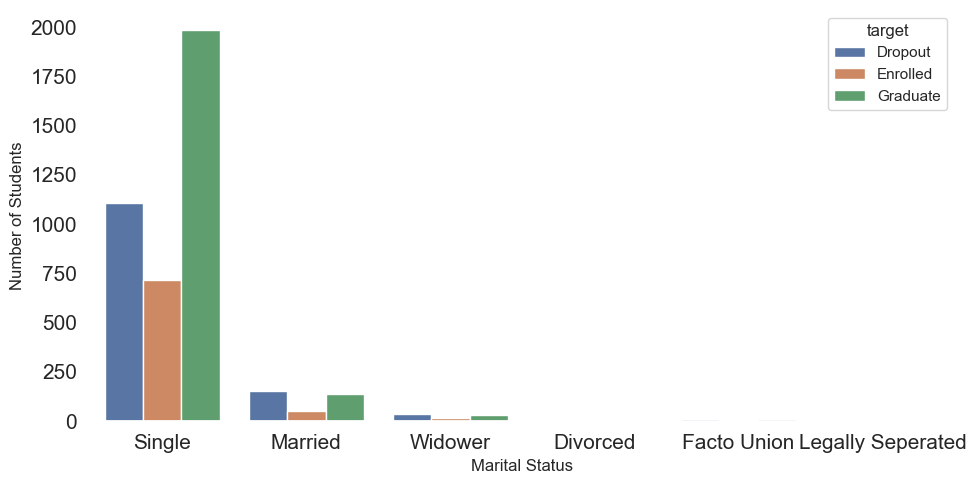

In [25]:
# plot the values of our target variable on a bar chart, per marital status
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'maritalStatus', hue = 'target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

The majority of students are single or married.

However, single students have a higher chance of graduation, while married students have a higher chance of dropouts.

# 7.2 Numerical variables exploration

Now we can __explore our numerical variables to understand their distribution, and identify outliers.__

In [26]:
# statistically describe our dataset (only numerical columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicationOrder,4276.0,1.735267,1.320493,0.00,1.0,1.000000,2.000000,9.000000
previousQualificationGrade,4276.0,132.648807,13.188983,95.00,125.0,133.100000,140.000000,190.000000
admissionGrade,4276.0,127.166698,14.438716,95.00,118.0,126.200000,135.000000,190.000000
ageAtEnrollment,4276.0,23.066183,7.432917,17.00,19.0,20.000000,24.000000,70.000000
international,4276.0,0.025257,0.156924,0.00,0.0,0.000000,0.000000,1.000000
curricularUnits1stSemesterCredited,4276.0,0.684518,2.307547,0.00,0.0,0.000000,0.000000,20.000000
curricularUnits1stSemesterEnrolled,4276.0,6.258653,2.462060,0.00,5.0,6.000000,7.000000,26.000000
curricularUnits1stSemesterEvaluations,4276.0,8.284612,4.155364,0.00,6.0,8.000000,10.000000,45.000000
curricularUnits1stSemesterApproved,4276.0,4.746024,3.045625,0.00,3.0,5.000000,6.000000,26.000000
curricularUnits1stSemesterGrade,4276.0,10.738921,4.772158,0.00,11.0,12.333333,13.416354,18.875000


Plot __histograms and boxplot to understand the distribution of our numerical variables__ and identify outliers.


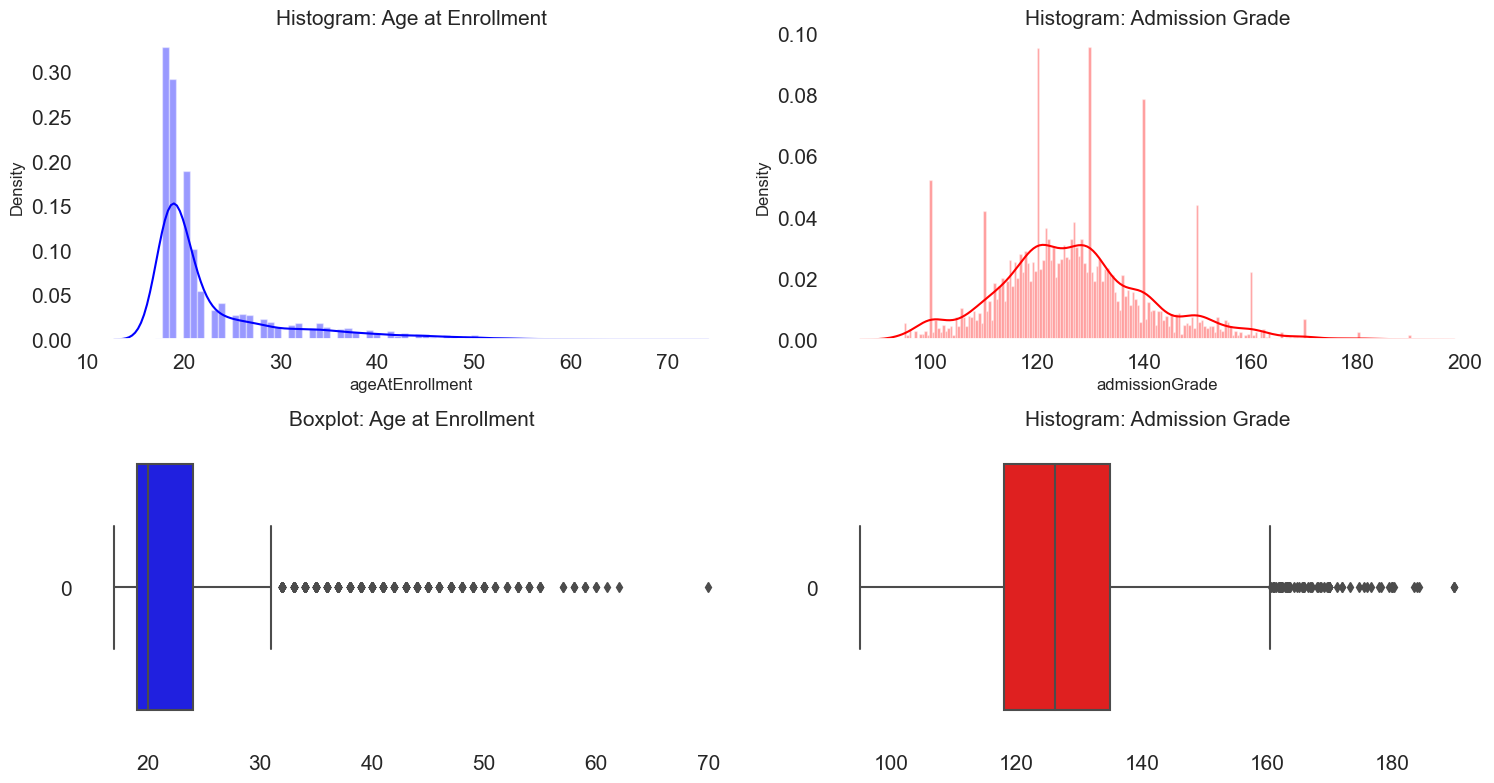

In [27]:
# Variables plotted: 'ageAtEnrollment', 'admissionGrade'
plt.subplots(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Histogram: Age at Enrollment', fontdict={'fontsize':15})
sns.distplot(df.ageAtEnrollment, color='blue', bins=73)

plt.subplot(2,2,2)
plt.title('Histogram: Admission Grade', fontdict={'fontsize':15})
sns.distplot(df.admissionGrade, color='red', bins=198)

plt.subplot(2,2,3)
plt.title('Boxplot: Age at Enrollment', fontdict={'fontsize':15})
sns.boxplot(df.ageAtEnrollment, orient='h',color="blue")

plt.subplot(2,2,4)
plt.title('Histogram: Admission Grade', fontdict={'fontsize':15})
sns.boxplot(df.admissionGrade, orient='h', color="red")

plt.show()

Age at Enrollment:
- The distribution of age at enrolment is positively skewed, indicating that the majority of students enrolled at a relatively young age. 
- The mean age at enrolment is approximately 23 years old, with the most frequent age range falling between 19 to 25 years old.
- There are some outliers of people that enrolled after 40.

Admission Grade:
- The distribution follows a normal distribution, with most grades around 120 and 130.
- There are many outliers of students with outstanding grades over 160.

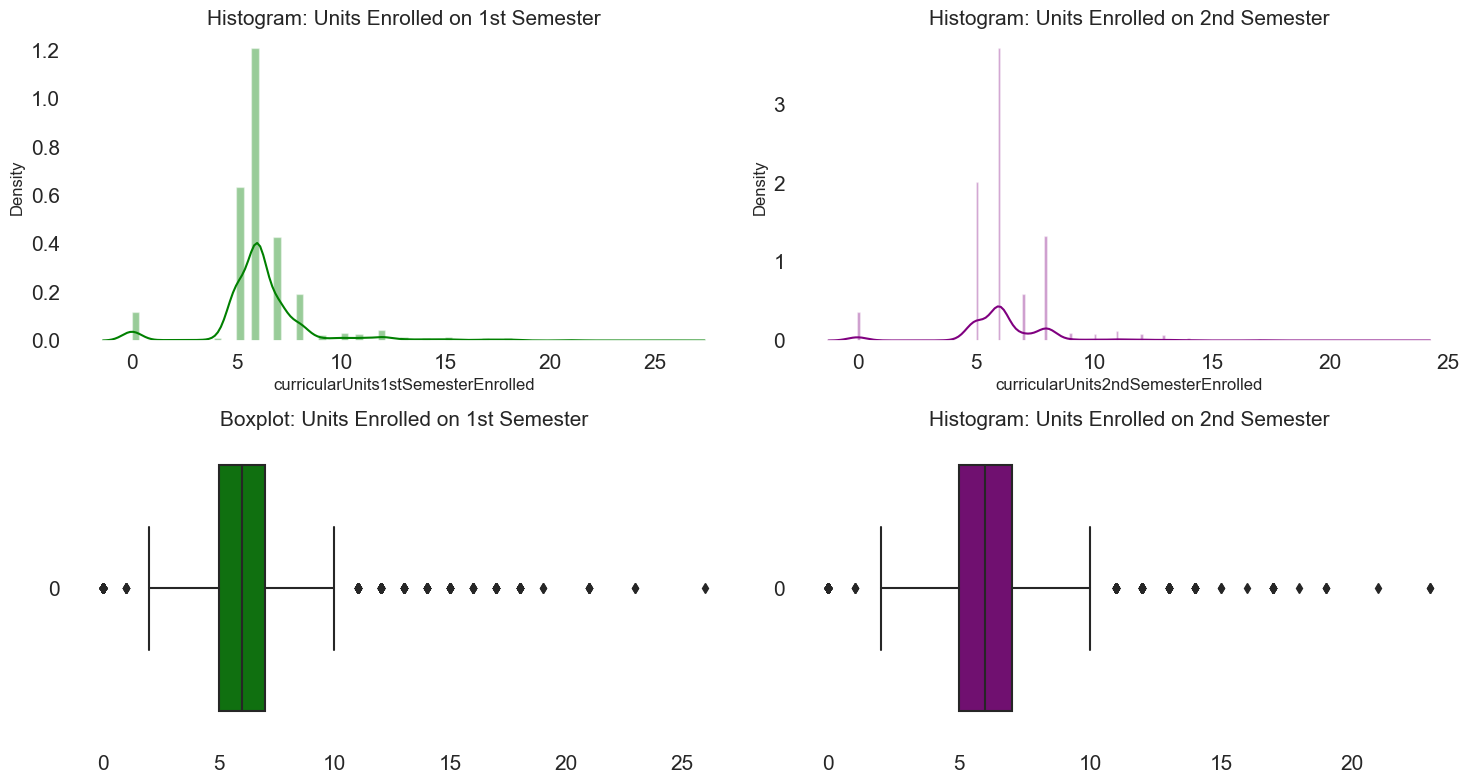

In [28]:
# Variables plotted: 'curricularUnits1stSemesterEnrolled', 'curricularUnits2ndSemesterEnrolled'
plt.subplots(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Histogram: Units Enrolled on 1st Semester', fontdict={'fontsize':15})
sns.distplot(df.curricularUnits1stSemesterEnrolled, color='green', bins=73)

plt.subplot(2,2,2)
plt.title('Histogram: Units Enrolled on 2nd Semester', fontdict={'fontsize':15})
sns.distplot(df.curricularUnits2ndSemesterEnrolled, color='purple', bins=198)

plt.subplot(2,2,3)
plt.title('Boxplot: Units Enrolled on 1st Semester', fontdict={'fontsize':15})
sns.boxplot(df.curricularUnits1stSemesterEnrolled, orient='h',color="green")

plt.subplot(2,2,4)
plt.title('Histogram: Units Enrolled on 2nd Semester', fontdict={'fontsize':15})
sns.boxplot(df.curricularUnits2ndSemesterEnrolled, orient='h', color="purple")

plt.show()

__Units Enrolled on 1st Semester vs 2nd Semester:__
- When comparing both variables there is a trend of students taking less subjects (or units) on the second semester.
- Most students take around 5 to 8 curricular units on a given semester.
- There are few outliers on both sides, with students that take 0 units, and others that take more than 10 units.


# 7.3 Handling Outliers

# 7.4 Standard Scaling, Label encoding, and One-Hot encoding

To know which technique to use, we should identify our numerical and categorical columns

In [29]:
# Identify our numerical and cateogrical variables
numerical_cols = [col for col in df.columns if df[col].dtypes!='O']
categorical_cols = [col for col in df.columns if df[col].dtypes=='O']

print(f"We have {len(numerical_cols)} nuemrical columns, and {len(categorical_cols)} categorical columns including the target.", end="\n\n")
print(f"Our numerical columns are:")
display(numerical_cols)
print()
print(f"Our categorical columns are:")
display(categorical_cols)

We have 20 nuemrical columns, and 17 categorical columns including the target.

Our numerical columns are:


['applicationOrder',
 'previousQualificationGrade',
 'admissionGrade',
 'ageAtEnrollment',
 'international',
 'curricularUnits1stSemesterCredited',
 'curricularUnits1stSemesterEnrolled',
 'curricularUnits1stSemesterEvaluations',
 'curricularUnits1stSemesterApproved',
 'curricularUnits1stSemesterGrade',
 'curricularUnits1stSemesterWithoutEvaluations',
 'curricularUnits2ndSemesterCredited',
 'curricularUnits2ndSemesterEnrolled',
 'curricularUnits2ndSemesterEvaluations',
 'curricularUnits2ndSemesterApproved',
 'curricularUnits2ndSemesterGrade',
 'curricularUnits2ndSemesterWithoutEvaluations',
 'unemploymentRate',
 'inflationRate',
 'GDP']


Our categorical columns are:


['maritalStatus',
 'applicationMode',
 'course',
 'attendanceMode',
 'previousQualification',
 'nationality',
 'mothersQualification',
 'fathersQualification',
 'mothersOccupation',
 'fathersOccupation',
 'displaced',
 'educationalSpecialNeeds',
 'debtor',
 'tuitionFeesUpToDate',
 'gender',
 'scholarshipHolder',
 'target']

Given these columns we can apply

__Standard Scaling__

- all numerical columns

__Label Encoding__
- all categorical columns
- target variable

__One-Hot Encoding__
- None, because __all of our categorical variables are nominal__ and we don't have ordinal variables. One-Hot Encoding is only applied to ordinal variables.

When applying __Label Encoding to our target variable__, the mapping will be as follows:

- __0: Dropout__
- __1: Enrolled__
- __2: Graduate__

Let's apply label encoding to our corresponding variables.

In [30]:
# Prepare our label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder ()

categorical_df = df[categorical_cols].copy()
numerical_df = df[numerical_cols].copy()

# Apply label encoding
for col in categorical_df:
    categorical_df[col] = label_encoder.fit_transform(categorical_df[col])

# Joining the encoded data to the rest of our columns
df = pd.concat([numerical_df, categorical_df], axis=1)
df.head()

,applicationOrder,previousQualificationGrade,admissionGrade,ageAtEnrollment,international,curricularUnits1stSemesterCredited,curricularUnits1stSemesterEnrolled,curricularUnits1stSemesterEvaluations,curricularUnits1stSemesterApproved,curricularUnits1stSemesterGrade,...,fathersQualification,mothersOccupation,fathersOccupation,displaced,educationalSpecialNeeds,debtor,tuitionFeesUpToDate,gender,scholarshipHolder,target
0,5,122.0,127.3,20,0,0,0,0,0,0.000000,...,26,16,40,1,0,0,1,1,0,0
1,1,160.0,142.5,19,0,0,6,6,6,14.000000,...,20,8,15,1,0,0,0,1,0,2
2,5,122.0,124.8,19,0,0,6,0,0,0.000000,...,9,27,40,1,0,0,0,1,0,0
3,2,122.0,119.6,20,0,0,6,8,6,13.428571,...,9,16,15,1,0,0,1,0,0,2
4,1,100.0,141.5,45,0,0,6,9,5,12.333333,...,10,27,40,0,0,0,1,0,0,2


In [31]:
# Checking the new values of target variable
df['target'].value_counts()

2    2172
0    1313
1     791
Name: target, dtype: int64

Now that __all of our variables are numerical__, including our target,

we can __apply a standard scaling__ to our variables, __excluding the target.__

In [32]:
# Set the new numerical columns (all columns) and exclude our target
numerical_cols += categorical_cols
numerical_cols.remove('target')

# Create numerical pipeline to scale our numerical values
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

numerical_cols_list = list(numerical_cols)

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("numerical", pipeline_numerical, numerical_cols_list),
])

In [33]:
# Apply the standard scaling using the built pipeline
pipeline_full.fit(df)
df_scaled_array = pipeline_full.transform(df)
df_scaled = pd.DataFrame(df_scaled_array)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,2.472649,-0.807496,0.009233,-0.412562,-0.160971,-0.296678,-2.542337,-1.993948,-1.558491,-2.250591,...,-0.601119,1.419957,-0.072083,1.186333,0.902314,-0.108773,-0.358926,0.362239,1.358996,-0.583111
1,-0.556877,2.074033,1.062082,-0.547115,-0.160971,-0.296678,-0.105068,-0.549863,0.411778,0.683435,...,1.528447,0.646192,-0.835964,-0.616635,0.902314,-0.108773,-0.358926,-2.760610,1.358996,-0.583111
2,2.472649,-0.807496,-0.163932,-0.547115,-0.160971,-0.296678,-0.105068,-1.993948,-1.558491,-2.250591,...,-0.905343,-0.772378,0.978253,1.186333,0.902314,-0.108773,-0.358926,-2.760610,1.358996,-0.583111
3,0.200504,-0.807496,-0.524117,-0.412562,-0.160971,-0.296678,-0.105068,-0.068501,0.411778,0.563679,...,-0.753231,-0.772378,-0.072083,-0.616635,0.902314,-0.108773,-0.358926,0.362239,-0.735837,-0.583111
4,-0.556877,-2.475750,0.992815,2.951248,-0.160971,-0.296678,-0.105068,0.172180,0.083400,0.334146,...,-0.905343,-0.643417,0.978253,1.186333,-1.108262,-0.108773,-0.358926,0.362239,-0.735837,-0.583111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,3.230031,-0.580007,-0.344025,-0.547115,-0.160971,-0.296678,-0.105068,-0.309182,0.083400,0.599606,...,1.528447,1.677879,-0.072083,-1.698416,-1.108262,-0.108773,-0.358926,0.362239,1.358996,-0.583111
4272,0.200504,-0.959156,-0.565677,-0.681667,6.212294,-0.296678,-0.105068,-0.549863,0.411778,0.264288,...,1.528447,1.677879,0.978253,1.186333,0.902314,-0.108773,2.786090,-2.760610,-0.735837,-0.583111
4273,-0.556877,1.619055,1.546946,0.932962,-0.160971,-0.296678,0.301144,-0.068501,0.740157,0.874671,...,-0.905343,-0.772378,0.978253,1.186333,0.902314,-0.108773,-0.358926,0.362239,-0.735837,1.714938
4274,-0.556877,3.590628,1.844791,-0.412562,-0.160971,-0.296678,-0.511279,-0.790544,0.083400,0.641520,...,-0.905343,-0.772378,0.309858,-1.698416,0.902314,-0.108773,-0.358926,0.362239,-0.735837,1.714938


# 7.5 Correlation between variables

Let's check the correlation between our variables and between the predictive variables and our target

<Axes: >

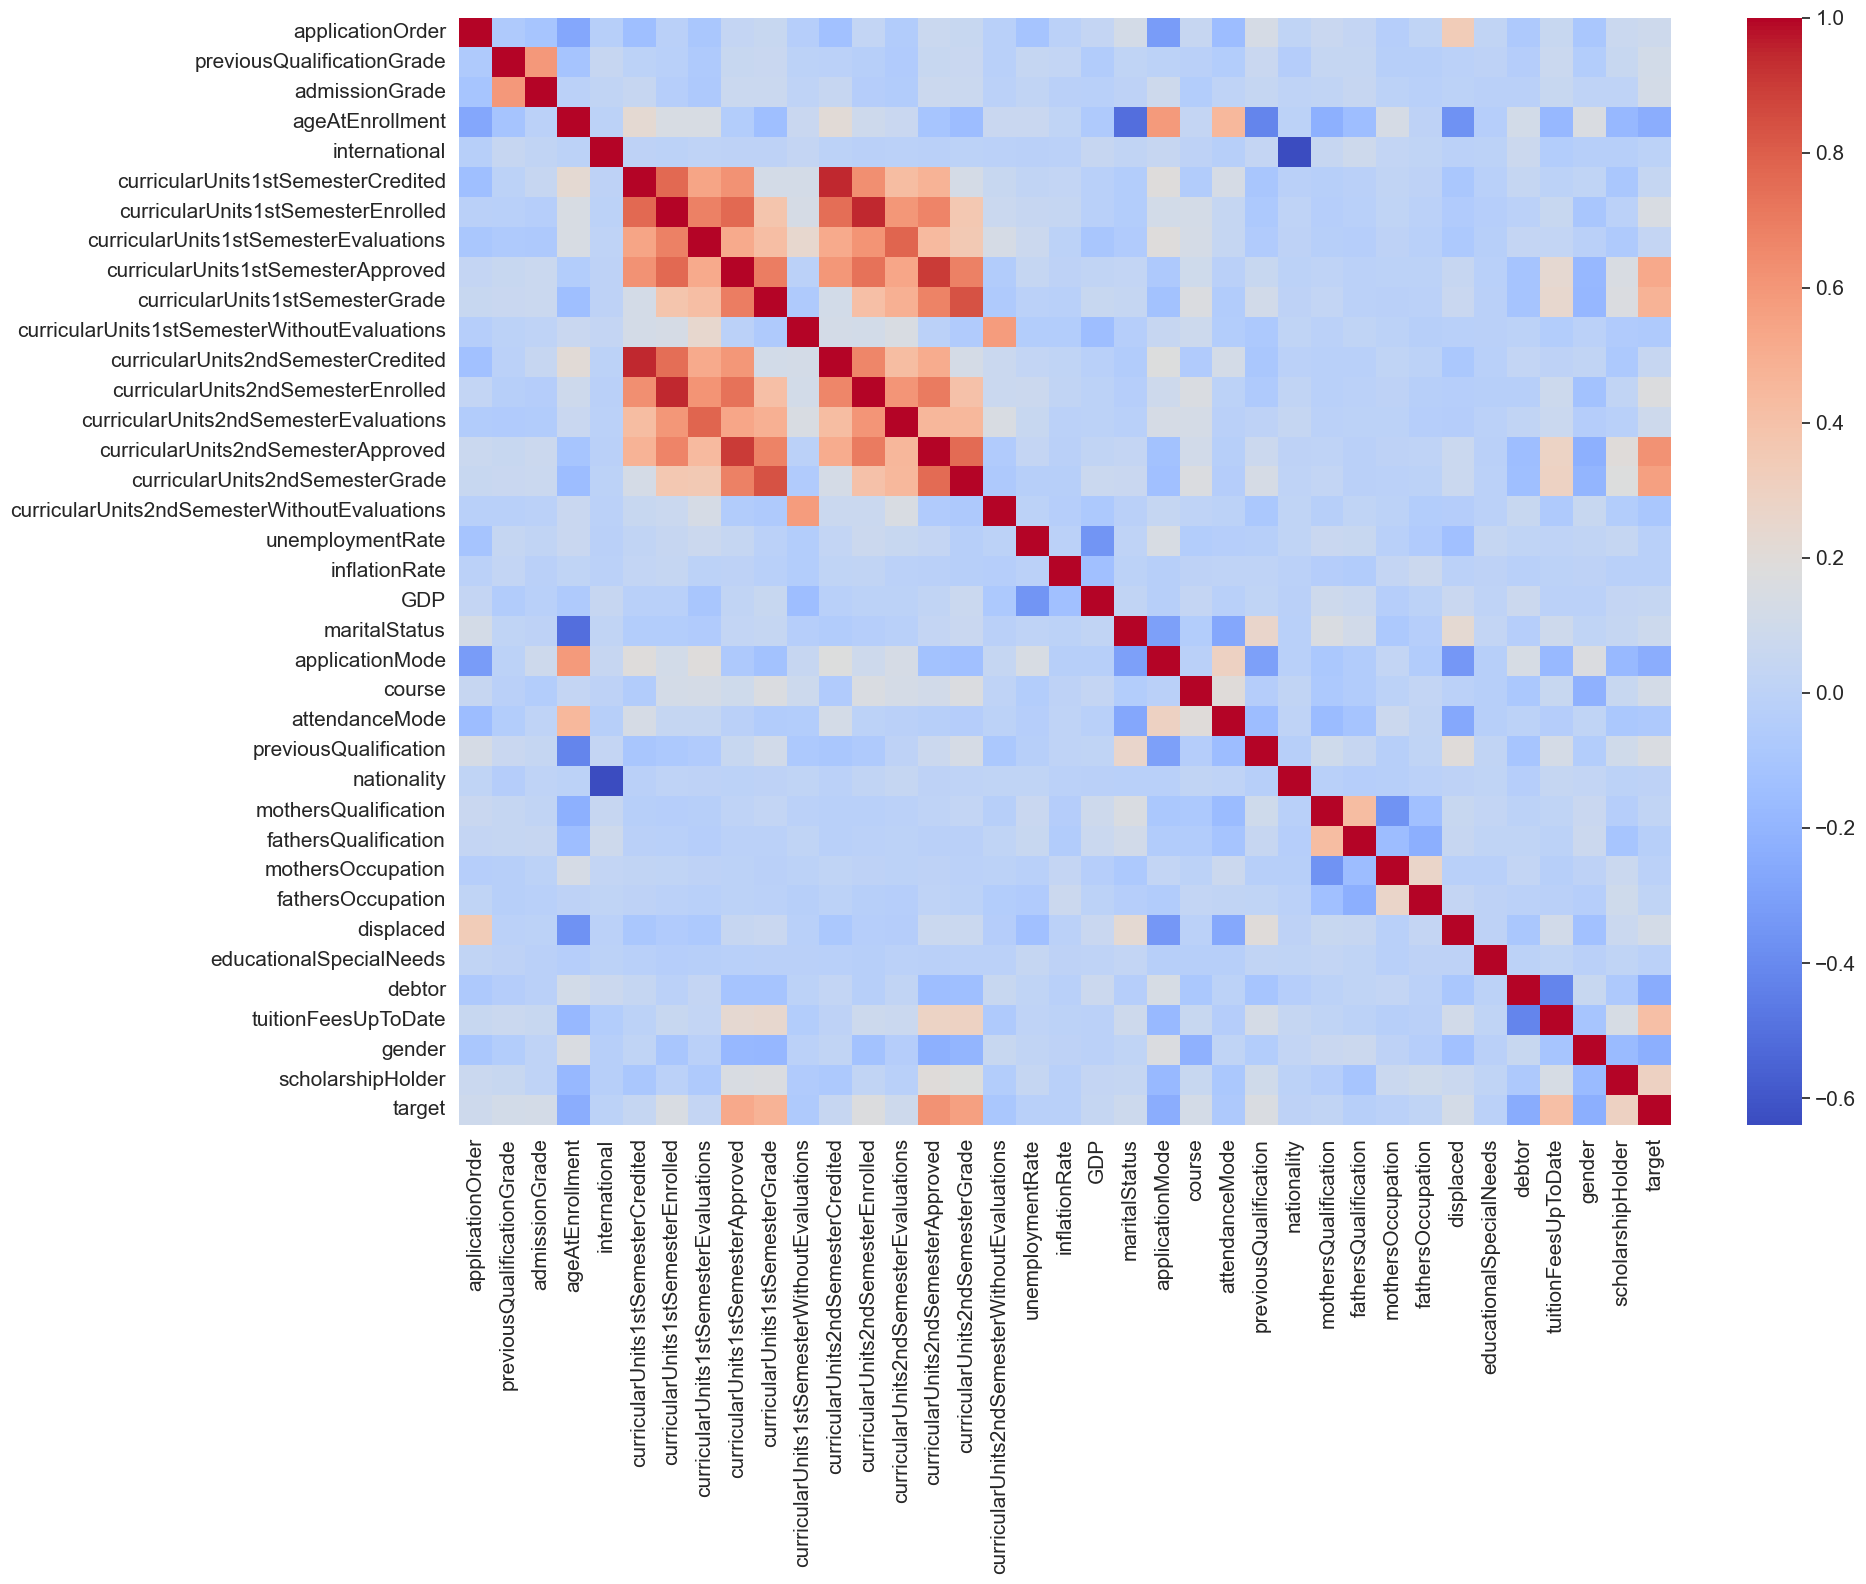

In [41]:
# Plot a heatmap to visualize the correlation between all variables

plt.figure(figsize = (20,16))

sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')

We can also calculate the __correlation coefficient between all variables and our target__.

In [42]:
# Check the correlation between our predictive variables and our target
df.corr().abs().target.sort_values(ascending=False)

target                                          1.000000
curricularUnits2ndSemesterApproved              0.619812
curricularUnits2ndSemesterGrade                 0.558501
curricularUnits1stSemesterApproved              0.523447
curricularUnits1stSemesterGrade                 0.478753
tuitionFeesUpToDate                             0.411268
scholarshipHolder                               0.295559
debtor                                          0.248219
applicationMode                                 0.242320
ageAtEnrollment                                 0.236493
gender                                          0.233075
curricularUnits2ndSemesterEnrolled              0.172855
previousQualification                           0.156647
curricularUnits1stSemesterEnrolled              0.152815
course                                          0.118864
displaced                                       0.117266
admissionGrade                                  0.116916
previousQualificationGrade     

- Apparently, correlation between features are low except for: curricularUnits2ndSemesterApproved, curricularUnits2ndSemesterGrade, and curricularUnits1stSemesterApproved
- Some variables are not correlated to our target at all, like: nationality, international, educationalSpecialNeeds, and  mothersOccupation.
- We can exclude some of these variables, to reinforce our model learning.

# 7.6 Splitting the data - Test & Train datasets

Let's __split the data in 2 subsets: train and test.__

This will __allow us to train our classification models.__

First, let's split our columns into X (predictive variables) and Y (target variable)

In [45]:
# Define our subsets: X - PREDICTIVE VARIABLES, Y - TARGET VARIABLE
x = df_scaled
y = df['target']

Now, let's __split both subsets into 4 subsets: train and test__ (for both X and Y)

In [46]:
# Define train and test for both X and Y
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

print('-'*34, '\n', ' '*20, 'X        Y')
print('-'*34, '\n', f'\033[94mTrain subset | ', x_train.shape, y_train.shape, '\n', f'\033[94mTest subset  |  ', x_test.shape, '', y_test.shape)

---------------------------------- 
                      X        Y
---------------------------------- 
 Train subset |  (3420, 36) (3420,) 
 Test subset  |   (856, 36)  (856,)


# 7.7 Modelling

To predict students' academic success and dropout, we will use __logistic regression__ to determine the target variable using the feature variables. 

To begin with the logistic regression as our machine learning model, we split the data into training and testing data. 

80% of the data will be our training model and rest 20% will be the testing model. 

Logistic regression will now be implemented using Extreme Gradient Boosting (XGBoost) which is one of the available open source libraries used for regression models. 

In this case, binary logistic is set for our model with 1000 n_estimators. 

The n_estimators serves as the number of decision trees or classification considering the data from feature variables.

In [ ]:
from xgboost import XGBClassifier
bin_log = XGBClassifier(objective = 'binary:logistic', n_estimators = 1000)
bin_log.fit(X_train, Y_train)

### Data Prediction and Evaluation of the Model
We now set the logistic regression model to the training data.

In [ ]:
target_prediction = bin_log.predict(X_test)
print(target_prediction)

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
data_accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", data_accuracy)

### Creating a System for Prediction

In [ ]:
input_data = (1, 1, 2, 14, 1, 1, 1, 3, 5, 4, 0, 0, 0, 1, 0, 0, 19, 0, 5, 5, 5, 1, 13, -3, 0, 0, 5, 5, 5, 13.2, 0, 9.4, -0.8, -3.12) 
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = bin_log.predict(input_data_reshaped)
print(prediction)
print("The initial value is ",prediction[0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

Model = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(3)] 

# Logging for Visual Comparison
log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Model:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print(f'\033[94m-'*30, '\n')
    print(name)
    
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, test_predictions)
    print("Accuracy: {:.2%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, test_predictions)
    print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print(f'\033[94m-'*30)

In [ ]:
## Visualizing the accuracy & log loss data

sns.set(rc = {'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.subplots(figsize = (10,5))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
sns.barplot(x = 'Accuracy', y = 'Model', data = log, color = '#40E0D0')
plt.xlabel('Accuracy %')
plt.title('Model Accuracy', fontdict={'fontsize':12})

plt.subplot(1,2,2)
sns.set_color_codes("bright")
sns.barplot(x='Log Loss', y='Model', data=log, color='#c7e9b4')
plt.xlabel('Log Loss')
plt.title('Model Log Loss', fontdict={'fontsize':12})

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.subplots(figsize = (10,5))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
ax1 = sns.barplot(x = 'Accuracy', y = 'Model', data = log, color = '#40E0D0')
plt.xlabel('Accuracy %')
plt.title('Model Accuracy', fontdict = {'fontsize':12})

for p in ax1.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax1.annotate(percentage, (x, y), ha = 'center', va = 'center', fontsize = 10)

plt.subplot(1,2,2)
sns.set_color_codes("bright")
ax2 = sns.barplot(x = 'Log Loss', y = 'Model', data = log, color = '#c7e9b4')
plt.xlabel('Log Loss')
plt.title('Model Log Loss', fontdict = {'fontsize':12})

for p in ax2.patches:
    percentage = '{:.2f}'.format(p.get_width())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax2.annotate(percentage, (x, y), ha = 'center', va = 'center', fontsize = 10)

plt.show()

# Stage 8 - Data Visualization (Results of Implementation)

On this stage we should __communicate__ the __results__ to our business users through the use of __graphics__ and receive feedback from them.

Now that we have a trained model, we can __visualize our results by plotting a confusion matrix, and ROC curve.__
- __confusion matrix__: comparing and visualizen true labels vs predicted labels
- __ROC curve__: visualizing the performance of our model

__Possible values__ for our __target variable__:
- __0: Dropout__
- __1: Enrolled__
- __2: Graduate__



In [50]:
# Plot a confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test, test_predictions_ramdom_forest_a, normalize=False, title = 'Confusion Matrix')

NameError: name 'Y_test' is not defined

In [49]:
# Plotting a ROC curve
skplt.metrics.plot_roc(y_test, test_predictions_ramdom_forest_l, title = 'ROC Plot for RandomForestClassifier')

NameError: name 'test_predictions_ramdom_forest_l' is not defined

# 8. Conclusions

# 9. References

- Dataset: Predict students' dropout and academic success

    https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
    
- EDA and Prediction of Student Academic Success

    https://www.kaggle.com/code/paulandrewpaglinawan/eda-and-prediction-of-student-academic-success